In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from lime.lime_tabular import LimeTabularExplainer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


df = pd.read_csv("bike.csv")
categorical = ['season', 'mnth', 'weekday', 'holiday', 'workday', 'weather']
numerical = ['temp', 'hum', 'windspeed', 'days_since_2011', 'cnt_2d_bfr', 'yr']
features = categorical + numerical

X = pd.get_dummies(df[features], drop_first=True)
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


rf = RandomForestRegressor(n_estimators=500, random_state=0)
rf.fit(X_train, y_train)

mlp = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('nn', MLPRegressor(hidden_layer_sizes=(100, 100, 100),
                        max_iter=500,
                        random_state=0))
])
mlp.fit(X_train, y_train)

lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])
lr.fit(X_train, y_train)


def regression_report(model, X_te, y_te, label):
    preds = model.predict(X_te)
    print(f"\n— {label} —")
    print(f"R²   : {r2_score(y_te, preds):.3f}")
    print(f"MAE  : {mean_absolute_error(y_te, preds):.2f}")
    rmse = np.sqrt(mean_squared_error(y_te, preds))
    print(f"RMSE : {rmse:.2f}")

regression_report(rf,  X_test, y_test,  "Random Forest")
regression_report(mlp, X_test, y_test,  "MLP (scaled)")
regression_report(lr, X_test, y_test, "Linear Regression")






— Random Forest —
R²   : 0.854
MAE  : 467.19
RMSE : 738.66

— MLP (scaled) —
R²   : 0.838
MAE  : 535.20
RMSE : 776.73

— Linear Regression —
R²   : 0.833
MAE  : 566.65
RMSE : 790.61


c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Ground Truth cound of insatnce 120: 4905
Random Forest prediction: 5120.19
MLP prediction: 5204.93
Linear Regression prediction: 5518.96


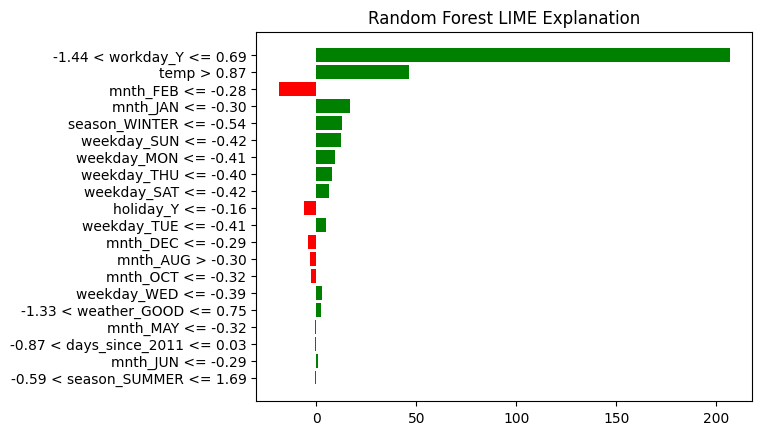

c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


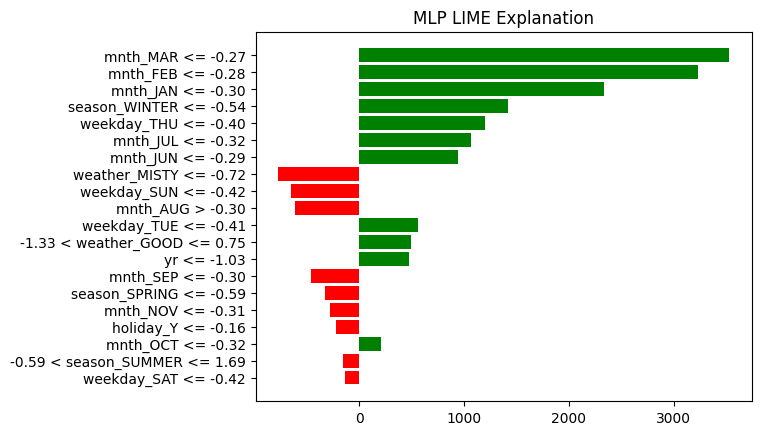

c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


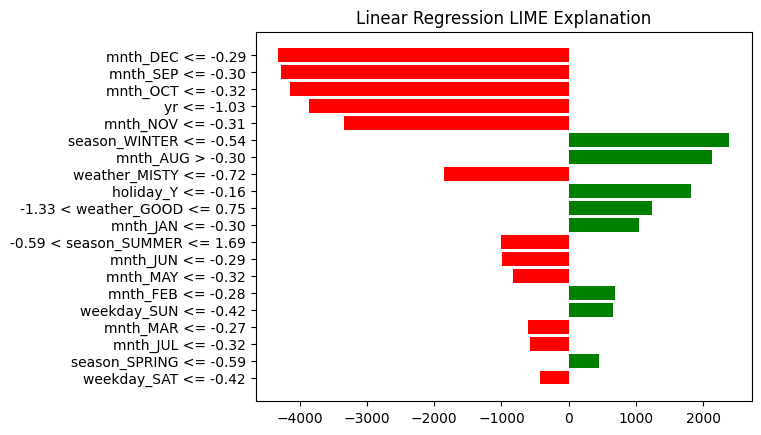

In [6]:
from sklearn.preprocessing import StandardScaler
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import numpy as np

# I had a problem where LIME gave unrealistic explanations, so I scaled the data to match the model's input and make the explanations accurate
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

explainer = LimeTabularExplainer(
    training_data   = X_train_scaled,
    feature_names   = X.columns.tolist(),
    mode            = 'regression',
    kernel_width    = 1
)

i = 120
test_scaled = X_test_scaled[i]

true_val    = y_test.iloc[i]
pred_rf_val = rf.predict([X_test.iloc[i].values])[0]
pred_mlp_val= mlp.predict([X_test.iloc[i].values])[0]
pred_lr_val = lr.predict([X_test.iloc[i].values])[0]

print(f"Ground Truth cound of insatnce {i}: {true_val}")
print(f"Random Forest prediction: {pred_rf_val:.2f}")
print(f"MLP prediction: {pred_mlp_val:.2f}")
print(f"Linear Regression prediction: {pred_lr_val:.2f}")

exp_rf = explainer.explain_instance(test_scaled, rf.predict, num_features=20)
exp_rf.as_pyplot_figure(); plt.title("Random Forest LIME Explanation"); plt.show()

exp_mlp = explainer.explain_instance(test_scaled, mlp.predict, num_features=20)
exp_mlp.as_pyplot_figure(); plt.title("MLP LIME Explanation"); plt.show()

exp_lr = explainer.explain_instance(test_scaled, lr.predict, num_features=20)
exp_lr.as_pyplot_figure(); plt.title("Linear Regression LIME Explanation"); plt.show()


c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


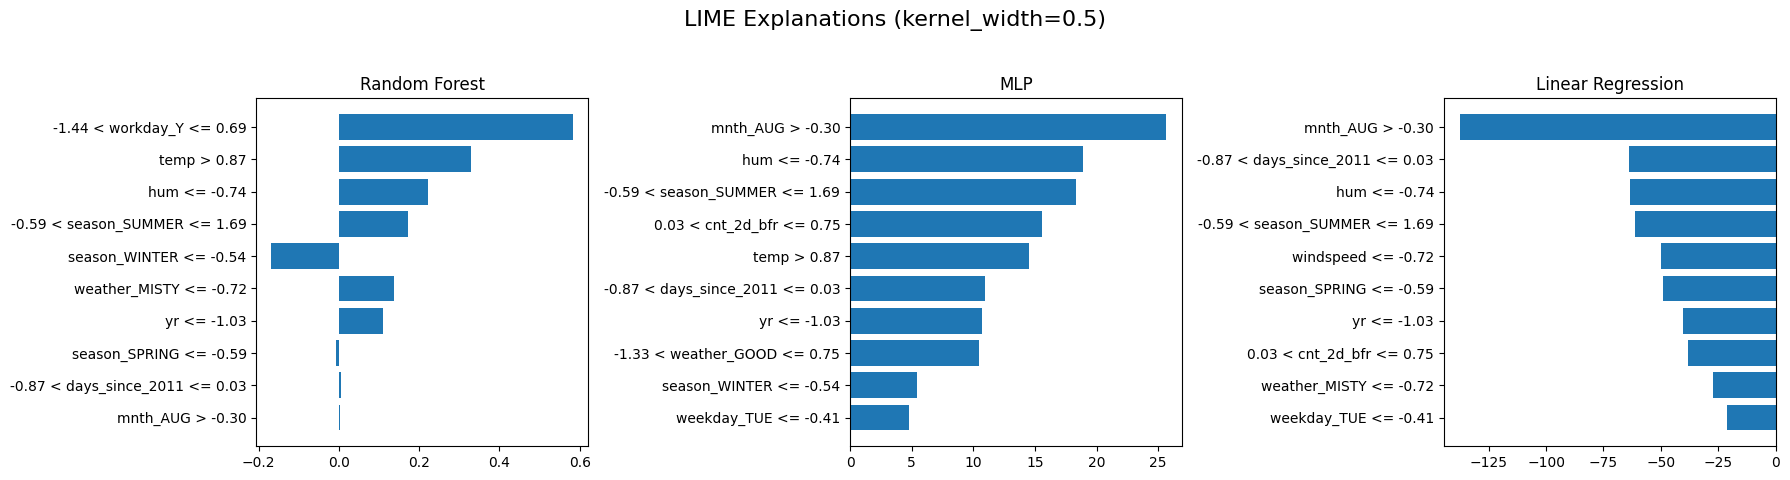

c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


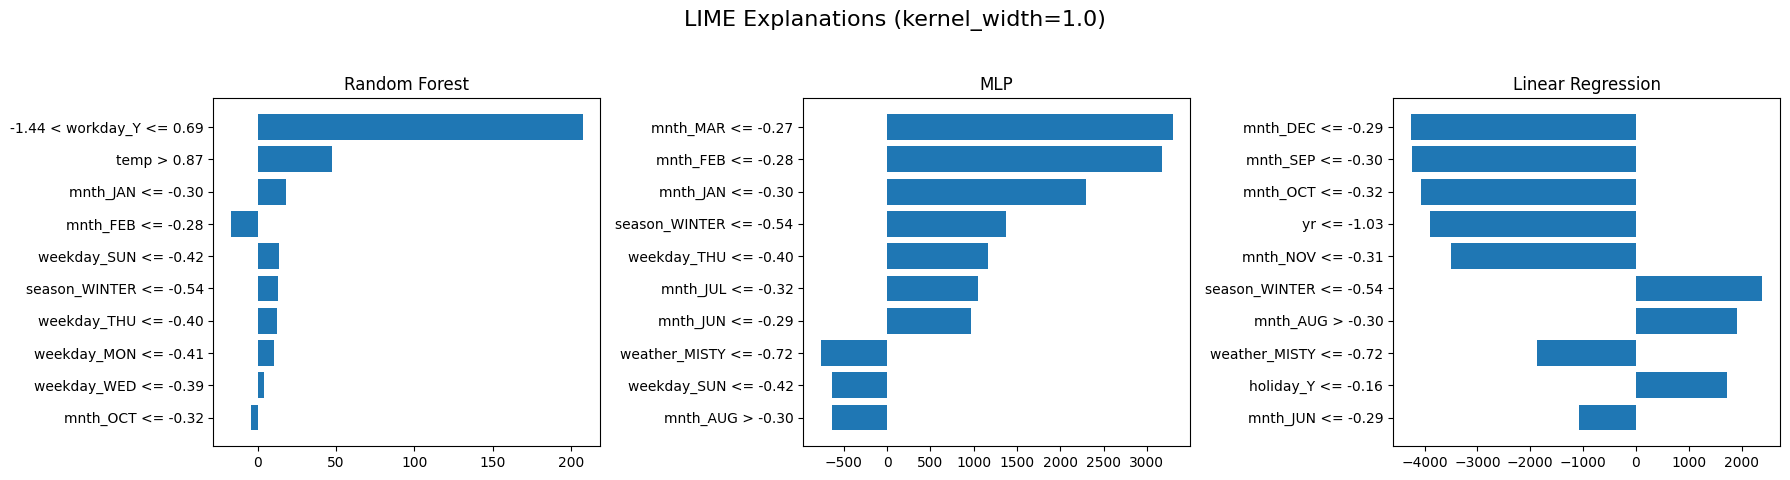

c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


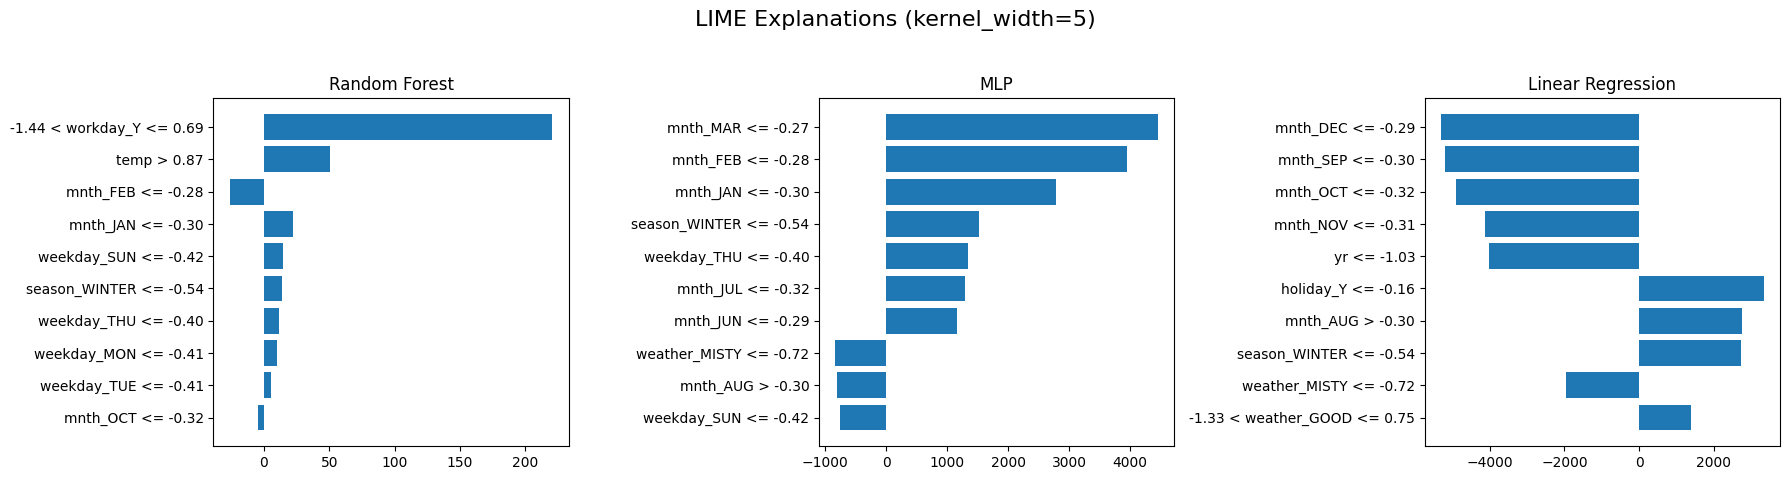

c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


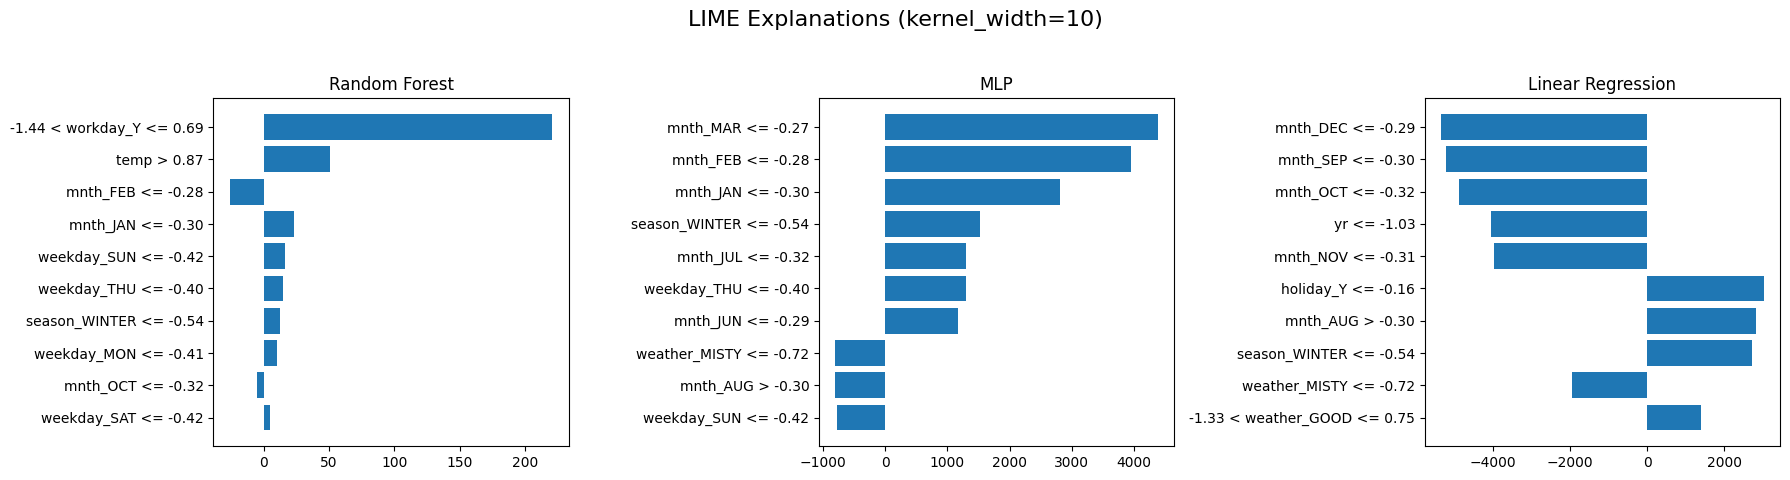

c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


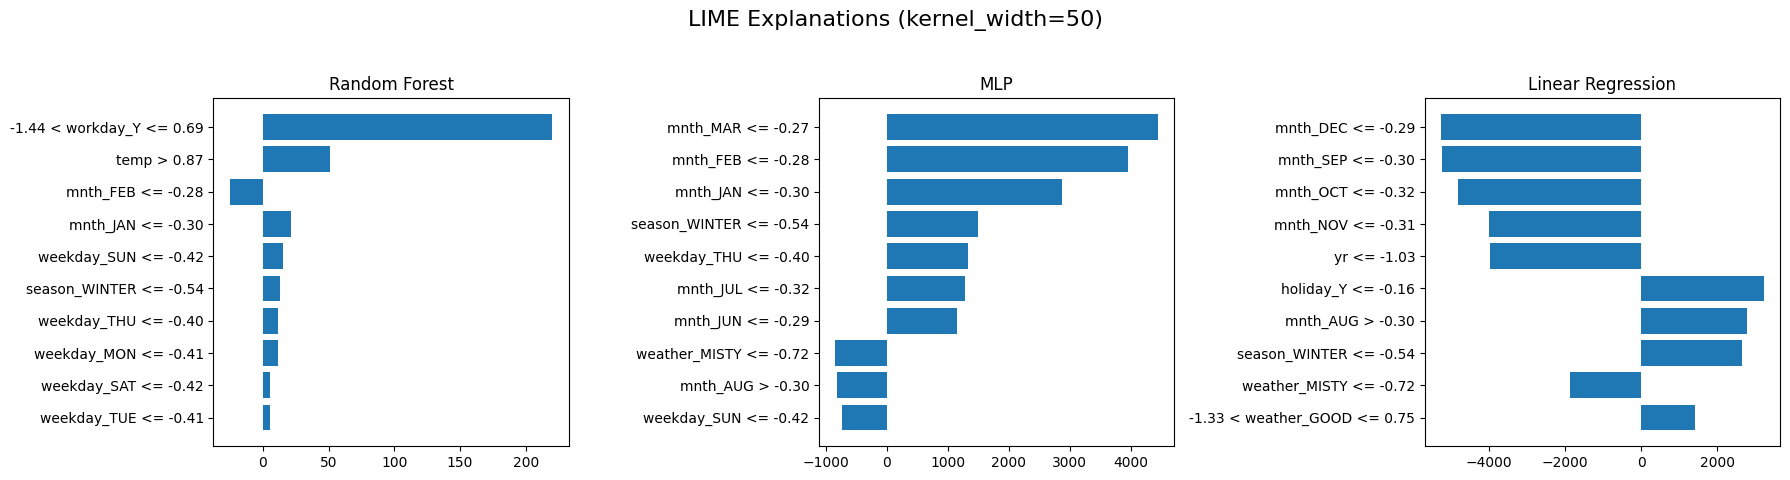

In [7]:
from sklearn.preprocessing import StandardScaler
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

i = 120
test_scaled = X_test_scaled[i]

kernel_sizes = [0.5, 1.0, 5, 10, 50]

models = {
    "Random Forest": rf.predict,
    "MLP": mlp.predict,
    "Linear Regression": lr.predict
}

for kw in kernel_sizes:
    explainer = LimeTabularExplainer(
        training_data = X_train_scaled,
        feature_names = X.columns.tolist(),
        mode = 'regression',
        kernel_width = kw
    )
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f"LIME Explanations (kernel_width={kw})", fontsize=16)

    for ax, (name, model) in zip(axes, models.items()):
        exp = explainer.explain_instance(test_scaled, model, num_features=10)
        exp_list = exp.as_list()
        labels, values = zip(*exp_list)

        ax.barh(labels, values)
        ax.set_title(name)
        ax.invert_yaxis()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



In [25]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('lime_explanations.pdf') as pdf:
    for kw in kernel_sizes:
        explainer = LimeTabularExplainer(
            training_data = X_train_scaled,
            feature_names = X.columns.tolist(),
            mode = 'regression',
            kernel_width = kw
        )

        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        fig.suptitle(f"LIME Explanations (kernel_width={kw})", fontsize=16)

        for ax, (name, model) in zip(axes, models.items()):
            exp = explainer.explain_instance(test_scaled, model, num_features=10)
            exp_list = exp.as_list()
            labels, values = zip(*exp_list)

            ax.barh(labels, values)
            ax.set_title(name)
            ax.invert_yaxis()

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        pdf.savefig(fig)
        plt.close()


c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature

In [6]:
# Excercise 1 b)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from lime.lime_tabular import LimeTabularExplainer

df = pd.read_csv("bike.csv")
categorical = ['mnth', 'weekday', 'holiday', 'workday', 'weather']
numerical = ['temp', 'hum', 'windspeed', 'days_since_2011', 'cnt_2d_bfr']
features = categorical + numerical

X = pd.get_dummies(df[features], drop_first=True)
y_class = (df['cnt'] > 4500).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)


clf = RandomForestClassifier(n_estimators=200, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.910958904109589
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        84
           1       0.90      0.89      0.89        62

    accuracy                           0.91       146
   macro avg       0.91      0.91      0.91       146
weighted avg       0.91      0.91      0.91       146



In [13]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X.columns.tolist(),
    class_names=['≤4500', '>4500'],
    mode='classification'
)

for i in [5, 10]:
    instance = X_test.iloc[i].values
    exp = explainer.explain_instance(instance, clf.predict_proba, num_features=12)
    display(HTML(exp.as_html()))


c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


c:\Users\joeld\anaconda3\envs\xai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
